In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [46]:
data = pd.read_csv('Xeek_train_subset_clean.csv')

In [47]:
data

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15-09-2013,494.528000,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15-09-2013,494.680000,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15-09-2013,494.832000,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15-09-2013,494.984000,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15-09-2013,495.136000,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16-02-2016,2207.310396,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,5.339929,2.531374,127.456139,NaN,3.607062,NaN,Sandstone
133194,16-02-2016,2207.462396,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,5.689734,2.526128,128.403305,NaN,3.609151,NaN,Sandstone
133195,16-02-2016,2207.614396,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,5.496074,2.528934,127.829262,NaN,3.594580,NaN,Sandstone
133196,16-02-2016,2207.766396,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,5.345353,2.527052,126.552277,NaN,3.534883,NaN,Sandstone


In [48]:
data.shape

(133198, 12)

In [49]:
data.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524496,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


In [52]:
data_well_lith = data[['WELL', 'LITH']]

In [53]:
data_well_lith

,WELL,LITH
0,15-09-2013,Shale
1,15-09-2013,Shale
2,15-09-2013,Shale
3,15-09-2013,Shale
4,15-09-2013,Shale
...,...,...
133193,16-02-2016,Sandstone
133194,16-02-2016,Sandstone
133195,16-02-2016,Sandstone
133196,16-02-2016,Sandstone


In [103]:
summary_well_lith = data_well_lith.groupby('WELL').value_counts(normalize=True).unstack(fill_value=0)
summary_well_lith

LITH,Anhydrite,Chalk,Coal,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale,Tuff
WELL,,,,,,,,,,,
15-09-2013,0.000930,0.000000,0.000000,0.002244,0.000000,0.077614,0.023481,0.160755,0.038752,0.686754,0.009469
15-09-2015,0.000000,0.054693,0.000000,0.000000,0.000000,0.051081,0.021731,0.153638,0.097590,0.613648,0.007620
15-09-2017,0.000000,0.000000,0.000000,0.001037,0.000000,0.085360,0.012968,0.133256,0.017349,0.731585,0.018444
16-01-2002,0.000000,0.000000,0.000000,0.024798,0.000000,0.155133,0.071511,0.396770,0.000000,0.351788,0.000000
16-02-2016,0.007481,0.000000,0.000000,0.000000,0.000000,0.127382,0.111521,0.130773,0.026334,0.579551,0.016958
16-10-2001,0.000000,0.055672,0.002772,0.004526,0.001132,0.132051,0.016634,0.054031,0.035248,0.692786,0.005149
16-10-2002,0.000000,0.007386,0.000000,0.000000,0.000000,0.054165,0.077554,0.393106,0.311859,0.155929,0.000000
16-10-2003,0.000000,0.041238,0.000564,0.000000,0.000000,0.091502,0.013099,0.050765,0.082289,0.704563,0.015981
16-10-2005,0.000000,0.000723,0.000000,0.000000,0.000000,0.241230,0.062929,0.196383,0.066546,0.432188,0.000000


In [102]:
summary_well_lith.style.format('{:.2%}')

LITH,Anhydrite,Chalk,Coal,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale,Tuff
WELL,,,,,,,,,,,
15-09-2013,0.09%,0.00%,0.00%,0.22%,0.00%,7.76%,2.35%,16.08%,3.88%,68.68%,0.95%
15-09-2015,0.00%,5.47%,0.00%,0.00%,0.00%,5.11%,2.17%,15.36%,9.76%,61.36%,0.76%
15-09-2017,0.00%,0.00%,0.00%,0.10%,0.00%,8.54%,1.30%,13.33%,1.73%,73.16%,1.84%
16-01-2002,0.00%,0.00%,0.00%,2.48%,0.00%,15.51%,7.15%,39.68%,0.00%,35.18%,0.00%
16-02-2016,0.75%,0.00%,0.00%,0.00%,0.00%,12.74%,11.15%,13.08%,2.63%,57.96%,1.70%
16-10-2001,0.00%,5.57%,0.28%,0.45%,0.11%,13.21%,1.66%,5.40%,3.52%,69.28%,0.51%
16-10-2002,0.00%,0.74%,0.00%,0.00%,0.00%,5.42%,7.76%,39.31%,31.19%,15.59%,0.00%
16-10-2003,0.00%,4.12%,0.06%,0.00%,0.00%,9.15%,1.31%,5.08%,8.23%,70.46%,1.60%
16-10-2005,0.00%,0.07%,0.00%,0.00%,0.00%,24.12%,6.29%,19.64%,6.65%,43.22%,0.00%


In [66]:
data_well = data.WELL.unique()
data_well

array(['15-09-2013', '15-09-2015', '15-09-2017', '16-01-2002', '16/1-6 A',
       '16-10-2001', '16-10-2002', '16-10-2003', '16-10-2005',
       '16/11-1 ST3', '16/2-11 A', '16-02-2016'], dtype=object)

In [68]:
wells = data.WELL.nunique()
print(f'Number of Wells in data: {wells}')

Number of Wells in data: 12


In [34]:
data.LITH.nunique()

11

In [27]:
data.LITH.value_counts()

LITH
Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: count, dtype: int64

In [93]:
# plotting for the lith distributoin in each well
summary_well_lith.hist(bins=50, figsize=(20,15))

AttributeError: 'Styler' object has no attribute 'hist'

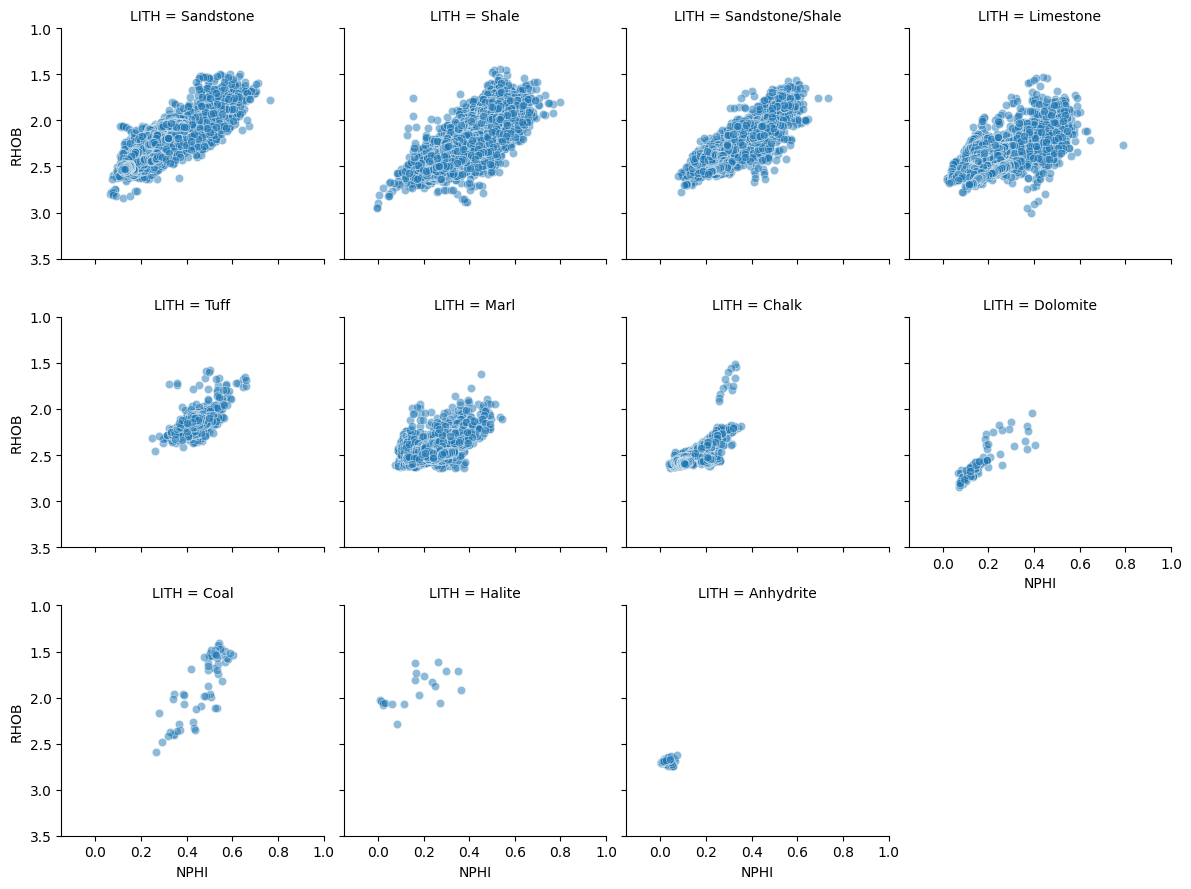

In [ ]:
g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot,'NPHI','RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3.5, 1))

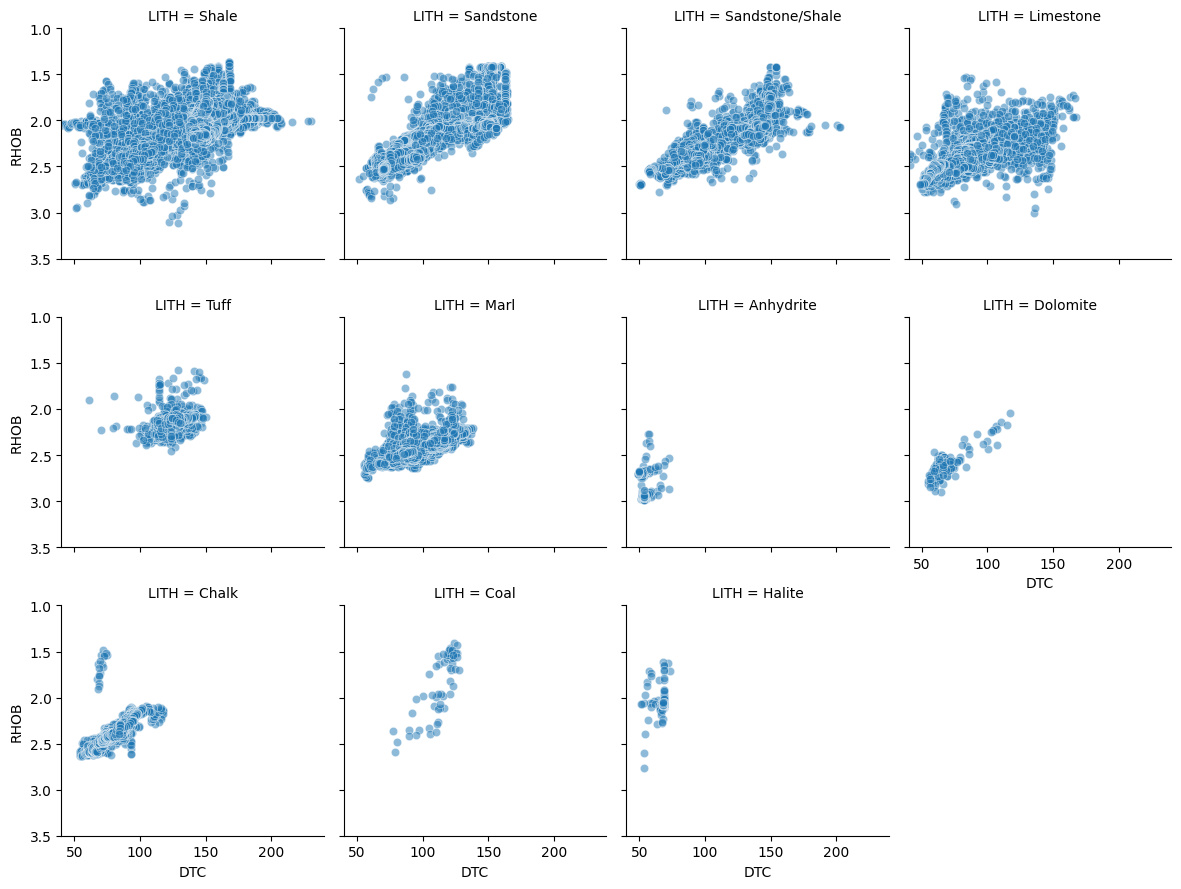

In [ ]:
g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'DTC', 'RHOB', alpha=0.5)
g.set(xlim=(40, 240))
g.set(ylim=(3.5, 1))

<Axes: >

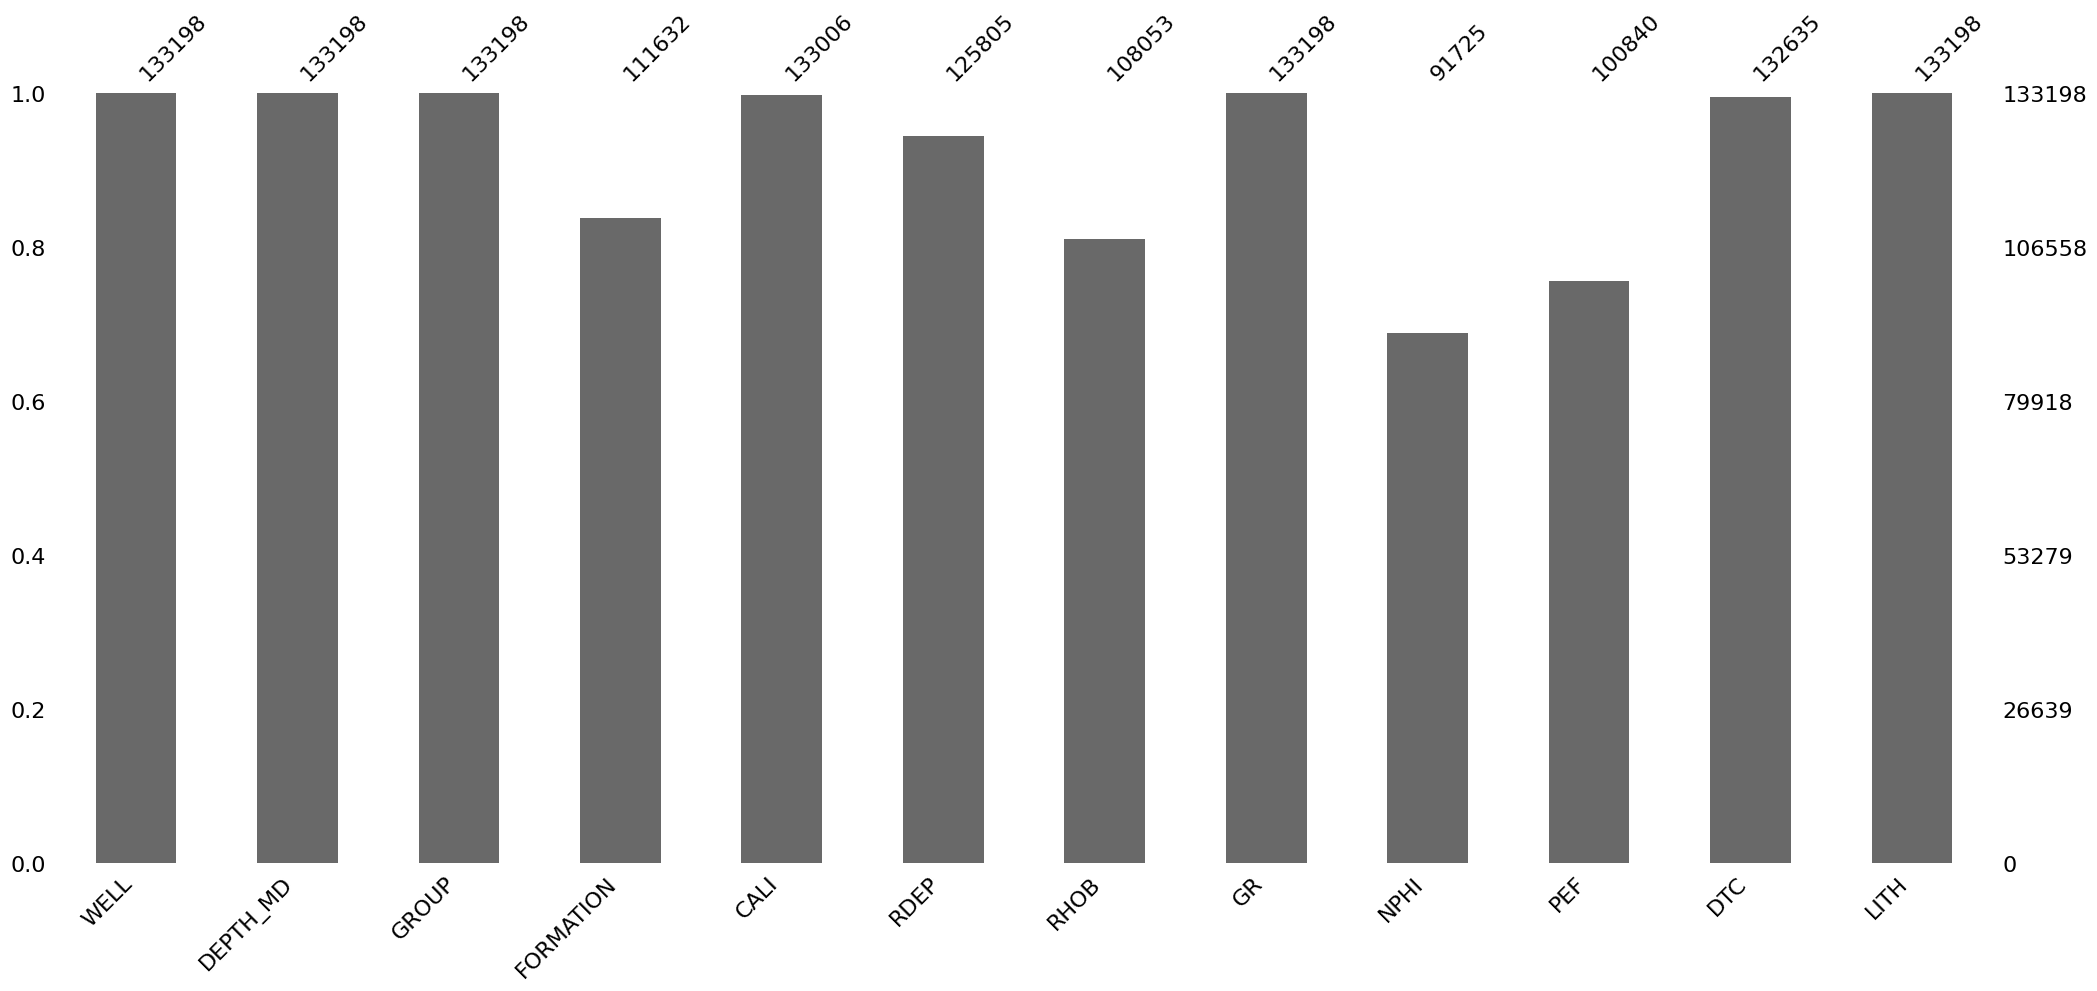

In [ ]:
mno.bar(df)

In [ ]:
df.dropna(inplace=True)

<Axes: >

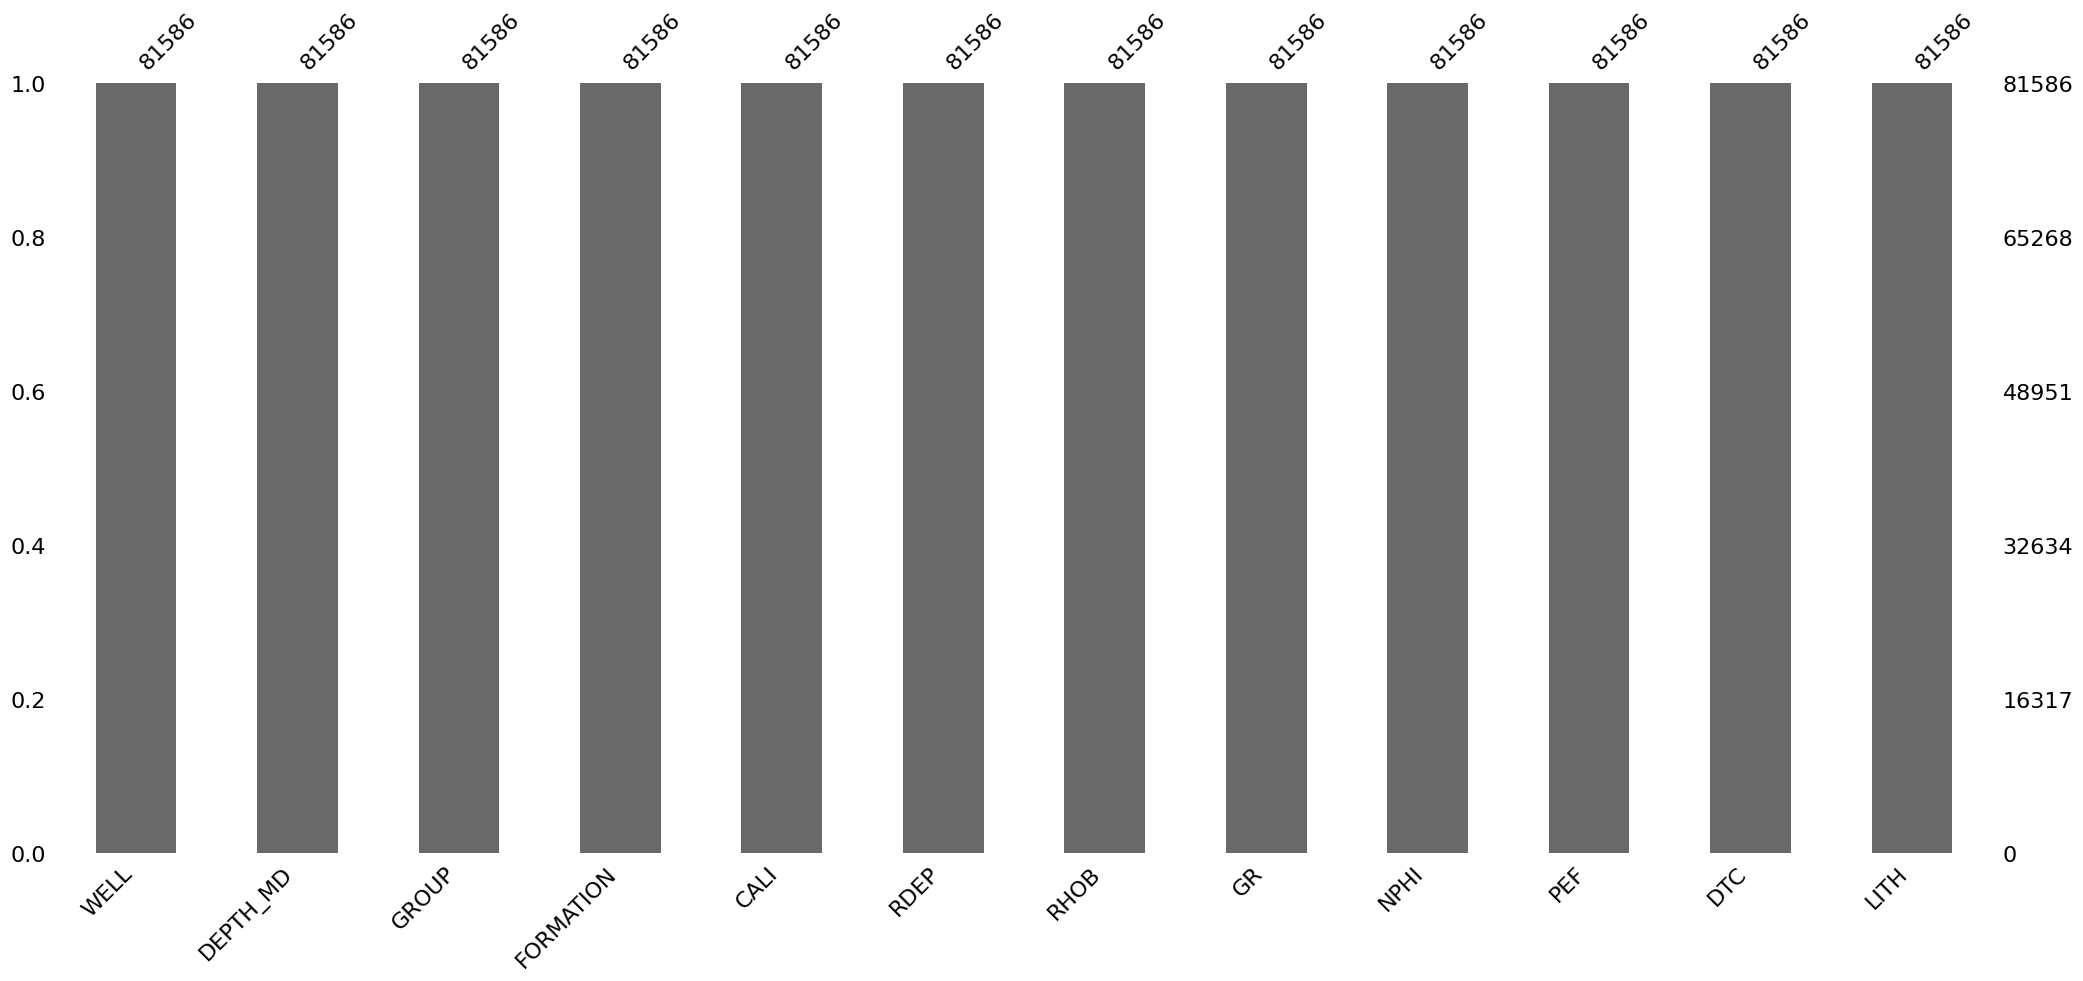

In [ ]:
mno.bar(df)

In [ ]:
df['LITH'].value_counts()

LITH
Shale              48705
Limestone          10973
Sandstone          10076
Sandstone/Shale     4578
Marl                3715
Chalk               2254
Tuff                1034
Dolomite              98
Anhydrite             75
Coal                  58
Halite                20
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Select inputs and target
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9120771367870567

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       1.00      1.00      1.00        23
          Chalk       0.84      0.71      0.77       693
           Coal       0.86      0.63      0.73        19
       Dolomite       0.60      0.55      0.57        22
         Halite       1.00      0.67      0.80         6
      Limestone       0.89      0.87      0.88      3359
           Marl       0.87      0.77      0.82      1121
      Sandstone       0.89      0.89      0.89      3020
Sandstone/Shale       0.78      0.63      0.70      1352
          Shale       0.94      0.98      0.96     14575
           Tuff       0.73      0.55      0.63       286

       accuracy                           0.91     24476
      macro avg       0.86      0.75      0.79     24476
   weighted avg       0.91      0.91      0.91     24476



In [ ]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   23     0     0     0     0     0     0     0     0     0     0]
 [    0   492     0     0     0   186     1     9     5     0     0]
 [    0     0    12     0     0     0     0     0     0     7     0]
 [    0     0     0    12     0     1     0     5     1     3     0]
 [    0     0     0     0     4     0     0     0     0     2     0]
 [    0    83     0     3     0  2910    70    48    17   220     8]
 [    0     6     0     0     0    99   861    14    17   122     2]
 [    0     2     1     2     0    31    13  2676    97   188    10]
 [    0     1     1     1     0    21    15   172   855   285     1]
 [    0     0     0     2     0    24    24    67   101 14321    36]
 [    0     0     0     0     0     1     4    13     1   109   158]]


In [ ]:
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

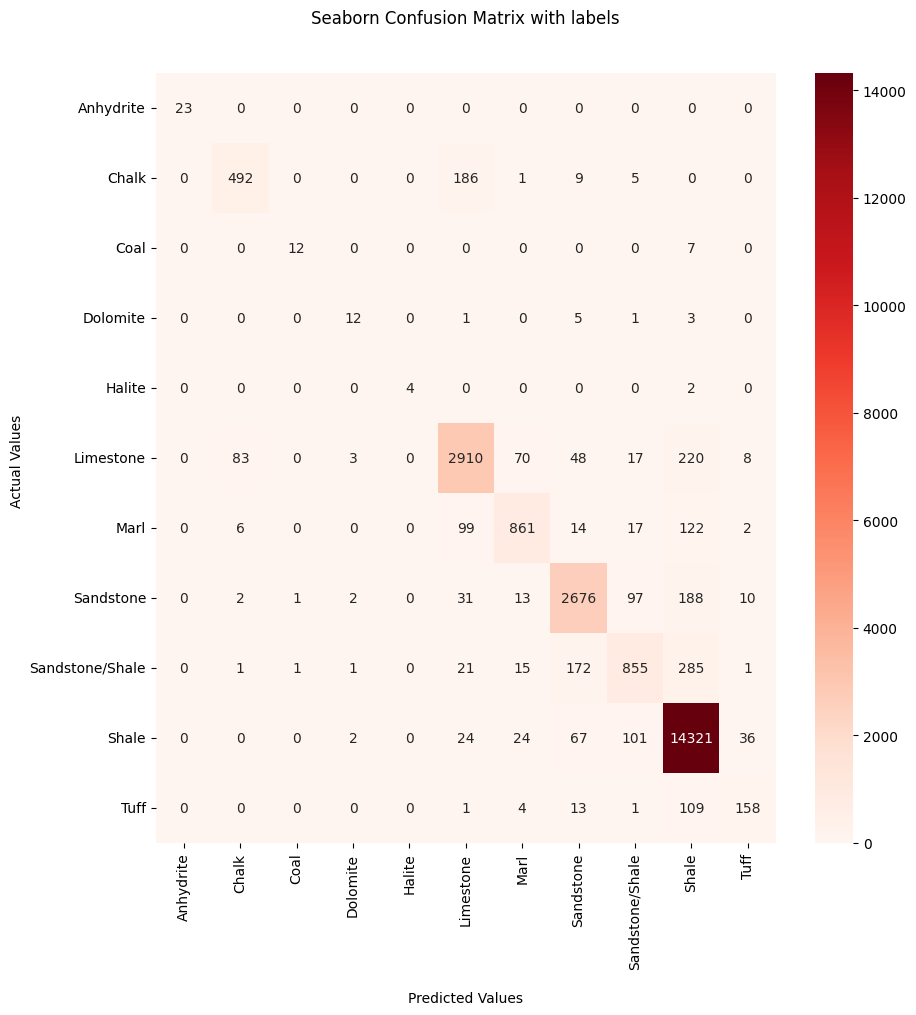

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels,
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [ ]:
import pickle

In [ ]:
# Save the model to a file using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
# Load the model and make predictions
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
df.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
4238,15-09-2013,1138.704,NORDLAND GP.,Utsira Fm.,19.322735,1.091499,1.774626,55.892757,0.765867,1.631495,147.837677,Sandstone
4239,15-09-2013,1138.856,NORDLAND GP.,Utsira Fm.,18.613674,1.122706,1.800986,60.929138,0.800262,1.645080,142.382431,Shale
4240,15-09-2013,1139.008,NORDLAND GP.,Utsira Fm.,18.212072,1.148141,1.817696,62.117264,0.765957,1.645873,138.258331,Shale
4241,15-09-2013,1139.160,NORDLAND GP.,Utsira Fm.,18.134182,1.170984,1.829333,61.010860,0.702521,1.620216,139.198914,Shale
4242,15-09-2013,1139.312,NORDLAND GP.,Utsira Fm.,18.033762,1.184080,1.813854,58.501236,0.639708,1.504854,144.290085,Shale


In [ ]:
df[df['LITH']=='Anhydrite'][['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]

,RDEP,RHOB,GR,NPHI,PEF,DTC
132408,21.205482,2.673551,47.363781,0.029912,5.207801,52.834705
132409,30.194645,2.668337,42.531849,0.033001,5.283839,51.988361
132410,24.457354,2.663410,38.827805,0.034977,5.387106,53.682190
132411,19.489340,2.658957,39.217316,0.036450,5.493585,56.536118
132412,13.364044,2.660366,41.669907,0.036226,5.542527,57.598244
...,...,...,...,...,...,...
132907,457.773193,2.691736,29.938101,0.009868,5.076392,49.577854
132908,312.851868,2.687263,30.797180,0.011827,5.100281,49.564304
132909,222.290344,2.686634,36.750736,0.015851,5.064608,49.617191
132910,197.069473,2.682709,58.700779,0.024947,4.860162,49.766243


In [ ]:
import numpy as np
X=[21.205482,2.673551,47.363781,0.029912,5.207801,52.834705]
X=np.array(X)
X=reshape(1,-1)
loaded_model.predict(X)

TypeError: array() missing required argument 'object' (pos 0)